***
<font size="10"><b>WeatherPy<b></font>
***

# SETUP

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

from api_keys import weather_api_key
from api_keys import gkey

from citipy import citipy

# Output file
output_data_file = "output_data/cities.csv"

# Range of latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# GENERATE CITIES LIST

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

# GET DATA

#### Perform API Calls

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

citynm = []
cityid = []
country = []
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
results = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop each city from the cities list generated above:
for city in cities:
    response = requests.get(query_url + city).json()    
    try:
        citynm_search = response['name']
        cityid_search = response['id']
        citynm.append(response['name'])
        cityid.append(response['id'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        results.append(print(f"Search for {citynm_search} (ID: {cityid_search}) found. Results added to library."))
    except (KeyError, IndexError):
        results.append(print(f"***Search for {city} not found. Skipping."))
    time.sleep(1)
        
# Include a print log of each city as it'sbeing processed (with the city number and city name)

Search for Selikhino (ID: 2017042) found. Results added to library.
Search for Saldanha (ID: 3361934) found. Results added to library.
Search for Lengshuijiang (ID: 1804169) found. Results added to library.
Search for Saint-Philippe (ID: 935215) found. Results added to library.
Search for Cape Town (ID: 3369157) found. Results added to library.
Search for Fairbanks (ID: 5861897) found. Results added to library.
Search for Busselton (ID: 2075265) found. Results added to library.
Search for Abha (ID: 110690) found. Results added to library.
Search for Hermanus (ID: 3366880) found. Results added to library.
Search for Kavieng (ID: 2094342) found. Results added to library.
Search for Upernavik (ID: 3418910) found. Results added to library.
Search for Punta Arenas (ID: 3874787) found. Results added to library.
Search for Jamestown (ID: 5122534) found. Results added to library.
Search for Vaini (ID: 4032243) found. Results added to library.
Search for Richards Bay (ID: 962367) found. Results

Search for Pevek (ID: 2122090) found. Results added to library.
Search for Shenjiamen (ID: 1795632) found. Results added to library.
Search for Faya (ID: 110690) found. Results added to library.
Search for Ndele (ID: 237379) found. Results added to library.
Search for Yarmouth (ID: 4956335) found. Results added to library.
Search for Tagusao (ID: 1684245) found. Results added to library.
Search for Cidreira (ID: 3466165) found. Results added to library.
***Search for attawapiskat not found. Skipping.
Search for Taganak (ID: 1684606) found. Results added to library.
Search for Vuktyl (ID: 470905) found. Results added to library.
Search for Hosur (ID: 1269934) found. Results added to library.
Search for Tricase (ID: 2522857) found. Results added to library.
Search for Prince Rupert (ID: 6113406) found. Results added to library.
Search for Kamenka (ID: 553766) found. Results added to library.
Search for Airai (ID: 1651810) found. Results added to library.
Search for Dubbo (ID: 2168305) fo

***Search for grand river south east not found. Skipping.
Search for Hobyo (ID: 57000) found. Results added to library.
Search for Villa Rica (ID: 4228452) found. Results added to library.
Search for Tazmalt (ID: 2477537) found. Results added to library.
Search for Ambositra (ID: 1079088) found. Results added to library.
***Search for paradwip not found. Skipping.
Search for Chokurdakh (ID: 2126123) found. Results added to library.
Search for Krasnoarmeysk (ID: 542464) found. Results added to library.
Search for Biltine (ID: 244878) found. Results added to library.
Search for Lieksa (ID: 648090) found. Results added to library.
***Search for ksenyevka not found. Skipping.
Search for Magadan (ID: 2123628) found. Results added to library.
Search for Hobo (ID: 3680854) found. Results added to library.
Search for Gualaquiza (ID: 3657661) found. Results added to library.
Search for Praia (ID: 3374333) found. Results added to library.
Search for Nome (ID: 5870133) found. Results added to lib

Search for Oranjemund (ID: 3354071) found. Results added to library.
***Search for kazalinsk not found. Skipping.
Search for Mizan Teferi (ID: 330534) found. Results added to library.
Search for Beringovskiy (ID: 2126710) found. Results added to library.
Search for Gambiran (ID: 8070858) found. Results added to library.
Search for Wanning (ID: 1791779) found. Results added to library.
Search for Marsabit (ID: 187585) found. Results added to library.
Search for Pangnirtung (ID: 6096551) found. Results added to library.
Search for Bonthe (ID: 2409914) found. Results added to library.
Search for Mar del Plata (ID: 3430863) found. Results added to library.
Search for Panguna (ID: 2088659) found. Results added to library.
Search for Bathsheba (ID: 3374083) found. Results added to library.
***Search for yusva not found. Skipping.
Search for Thompson (ID: 6165406) found. Results added to library.
Search for Dustlik (ID: 1514125) found. Results added to library.
Search for Henties Bay (ID: 335

Search for Saint-Louis (ID: 2246451) found. Results added to library.
Search for Wonthaggi (ID: 2154826) found. Results added to library.
Search for Grand-Lahou (ID: 2288105) found. Results added to library.
Search for Winnemucca (ID: 5710360) found. Results added to library.
Search for La Ronge (ID: 6050066) found. Results added to library.
Search for Kumul (ID: 1529484) found. Results added to library.
Search for Lodja (ID: 211647) found. Results added to library.
Search for Longyearbyen (ID: 2729907) found. Results added to library.
Search for Helong (ID: 2036933) found. Results added to library.
Search for Praia (ID: 3374333) found. Results added to library.
Search for Spirit River (ID: 6153766) found. Results added to library.
Search for Basco (ID: 1726449) found. Results added to library.
Search for Tsumeb (ID: 3352593) found. Results added to library.
Search for Aksarayskiy (ID: 583683) found. Results added to library.
Search for Ghanzi (ID: 933759) found. Results added to libra

Search for Charters Towers (ID: 2171722) found. Results added to library.
Search for Itoman (ID: 1861280) found. Results added to library.
***Search for ruatoria not found. Skipping.
Search for Ottawa (ID: 6094817) found. Results added to library.
Search for Saint-Tite (ID: 6139154) found. Results added to library.
Search for Spearfish (ID: 5769288) found. Results added to library.
***Search for kuche not found. Skipping.
Search for Bandarbeyla (ID: 64814) found. Results added to library.
Search for Saint-Joseph (ID: 6690296) found. Results added to library.
Search for Nuuk (ID: 3421319) found. Results added to library.
Search for Santiago de Chuco (ID: 3692072) found. Results added to library.


In [4]:
cityid_ct = len(cityid)
lat_ct = len(lat)
lng_ct = len(lng)
temp_ct = len(temp)
hum_ct = len(hum)
cloud_ct = len(cloud)
wind_ct = len(wind)
print(f"Id Count: {cityid_ct}")
print(f"Lat Count: {lat_ct}")
print(f"Lng Count: {lng_ct}")
print(f"Temp Count: {temp_ct}")
print(f"Hum Count: {hum_ct}")
print(f"Cloud Count: {cloud_ct}")
print(f"Wind Count: {wind_ct}")

Id Count: 587
Lat Count: 587
Lng Count: 587
Temp Count: 587
Hum Count: 587
Cloud Count: 587
Wind Count: 587


#### Convert Raw Data to DataFrame

In [5]:
# Display the DataFrame
weather_dict = {
    "City": citynm,
    "CityID": cityid,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,CityID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Selikhino,2017042,RU,50.37,137.50,-0.31,97,100,3.11
1,Saldanha,3361934,ZA,-33.01,17.94,80.60,39,0,11.41
2,Lengshuijiang,1804169,CN,27.69,111.43,41.83,96,94,4.27
3,Saint-Philippe,935215,RE,-21.36,55.77,80.60,88,100,8.05
4,Cape Town,3369157,ZA,-33.93,18.42,75.20,53,0,11.41


In [6]:
weather_df.dtypes

City            object
CityID           int64
Country         object
Latitude       float64
Longitude      float64
Temperature    float64
Humidity         int64
Cloudiness       int64
Wind Speed     float64
dtype: object

In [7]:
weather_df.isnull().sum()

City           0
CityID         0
Country        0
Latitude       0
Longitude      0
Temperature    0
Humidity       0
Cloudiness     0
Wind Speed     0
dtype: int64

In [8]:
# Export the city data into a .csv
weather_df.to_csv(output_data_file, mode = "w", index=False)

# SCATTER PLOTS

#### Latitude vs. Temperature Plot

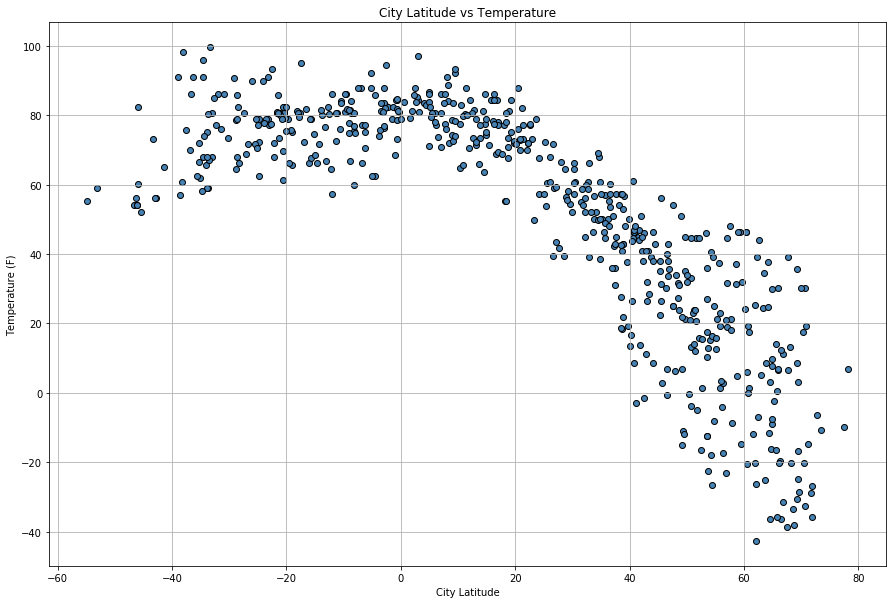

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.title("City Latitude vs Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

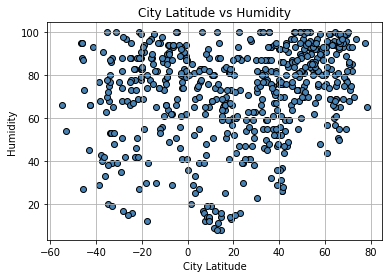

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.title("City Latitude vs Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

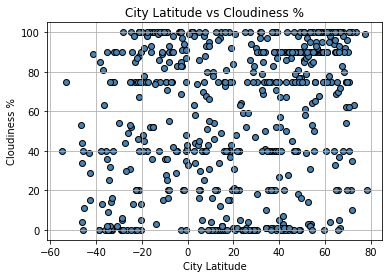

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.title("City Latitude vs Cloudiness %")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

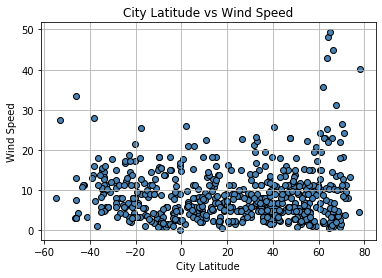

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.title("City Latitude vs Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.show()

# LINEAR REGRESSION

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
weather_df_north = weather_df[weather_df.Latitude >= 0]
weather_df_north.head()

,City,CityID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Selikhino,2017042,RU,50.37,137.50,-0.31,97,100,3.11
2,Lengshuijiang,1804169,CN,27.69,111.43,41.83,96,94,4.27
5,Fairbanks,5861897,US,64.84,-147.72,-9.00,69,90,1.12
7,Abha,110690,SA,18.22,42.51,55.40,81,40,6.93
10,Upernavik,3418910,GL,72.79,-56.15,-6.36,70,63,8.16


In [15]:
weather_df_north.shape

(405, 9)

In [16]:
weather_df_south = weather_df[weather_df.Latitude <= 0]
weather_df_south.head()

,City,CityID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,Saldanha,3361934,ZA,-33.01,17.94,80.60,39,0,11.41
3,Saint-Philippe,935215,RE,-21.36,55.77,80.60,88,100,8.05
4,Cape Town,3369157,ZA,-33.93,18.42,75.20,53,0,11.41
6,Busselton,2075265,AU,-33.65,115.33,59.00,53,0,9.69
8,Hermanus,3366880,ZA,-34.42,19.23,73.99,75,0,8.99


In [17]:
weather_df_south.shape

(182, 9)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: -0.8738022705440472


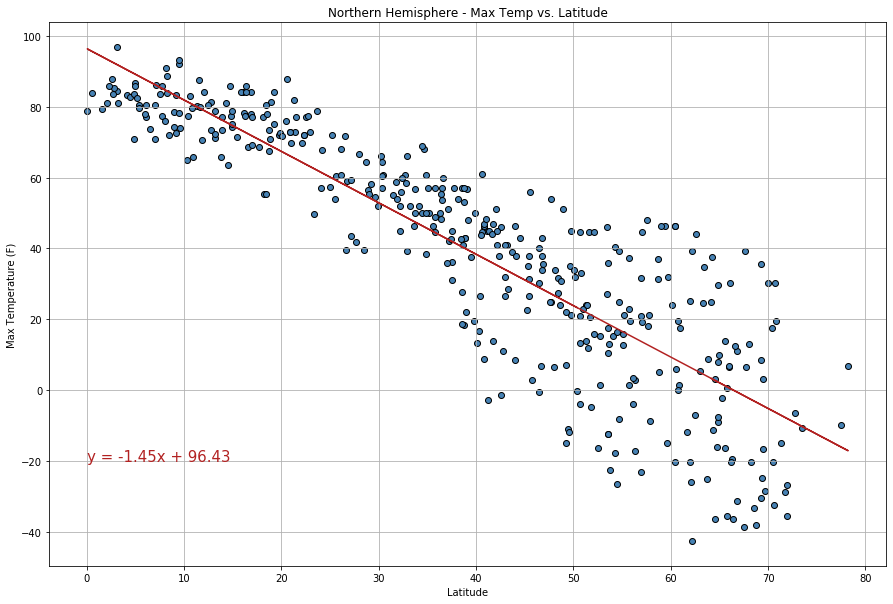

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_north["Latitude"], weather_df_north["Temperature"])
regress_values = weather_df_north["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,10))
plt.scatter(weather_df_north["Latitude"], weather_df_north["Temperature"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(weather_df_north["Latitude"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(0,-20),
             fontsize=15,
             color="firebrick"
            )
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.368481197694332


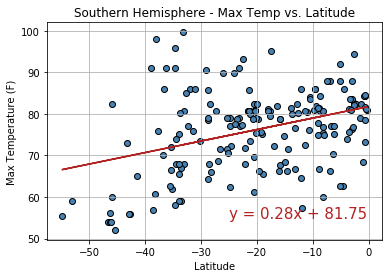

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_south["Latitude"], weather_df_south["Temperature"])
regress_values = weather_df_south["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_df_south["Latitude"], weather_df_south["Temperature"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(weather_df_south["Latitude"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(-25,55),
             fontsize=15,
             color="firebrick"
            )
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.452641246472638


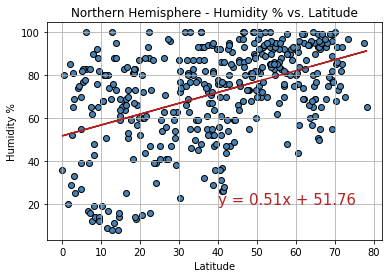

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_north["Latitude"], weather_df_north["Humidity"])
regress_values = weather_df_north["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_df_north["Latitude"], weather_df_north["Humidity"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(weather_df_north["Latitude"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(40,20),
             fontsize=15,
             color="firebrick"
            )
plt.title("Northern Hemisphere - Humidity % vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.21250394886799728


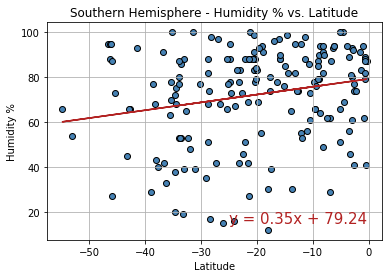

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_south["Latitude"], weather_df_south["Humidity"])
regress_values = weather_df_south["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_df_south["Latitude"], weather_df_south["Humidity"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(weather_df_south["Latitude"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(-25,15),
             fontsize=15,
             color="firebrick"
            )
plt.title("Southern Hemisphere - Humidity % vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.278780271333413


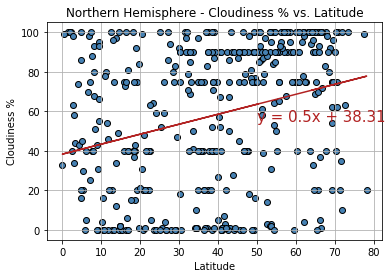

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_north["Latitude"], weather_df_north["Cloudiness"])
regress_values = weather_df_north["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_df_north["Latitude"], weather_df_north["Cloudiness"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(weather_df_north["Latitude"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(50,55),
             fontsize=15,
             color="firebrick"
            )
plt.title("Northern Hemisphere - Cloudiness % vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.369606672556998


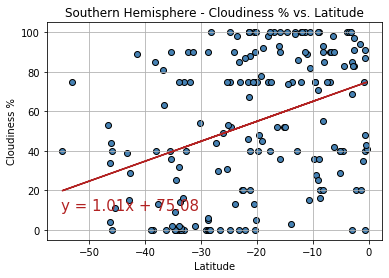

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_south["Latitude"], weather_df_south["Cloudiness"])
regress_values = weather_df_south["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_df_south["Latitude"], weather_df_south["Cloudiness"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(weather_df_south["Latitude"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(-55,10),
             fontsize=15,
             color="firebrick"
            )
plt.title("Southern Hemisphere - Cloudiness % vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.1573473235832357


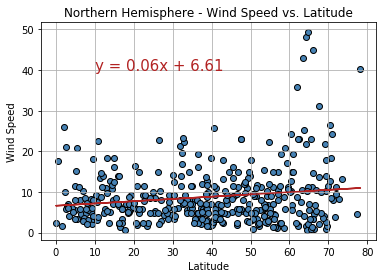

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_north["Latitude"], weather_df_north["Wind Speed"])
regress_values = weather_df_north["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_df_north["Latitude"], weather_df_north["Wind Speed"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(weather_df_north["Latitude"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(10,40),
             fontsize=15,
             color="firebrick"
            )
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.24721112487152194


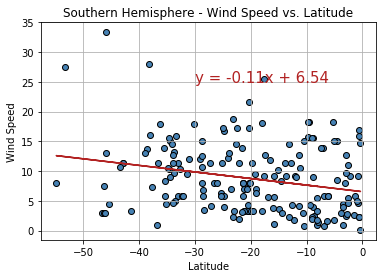

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df_south["Latitude"], weather_df_south["Wind Speed"])
regress_values = weather_df_south["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_df_south["Latitude"], weather_df_south["Wind Speed"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(weather_df_south["Latitude"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(-30,25),
             fontsize=15,
             color="firebrick"
            )
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

# APPENDIX

#### Basic OpenWeather search result (with json)

In [26]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "imperial"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

response = requests.get(query_url).json()
# json = response.json()

id = response["id"]
print(id)
# lat = response["coord"]["lat"]
# lng = json["coord"]["lon"]
# temperature = json["main"]["temp"]
# humidity = json["main"]["humidity"]
# cloudiness = json["clouds"]["all"]
# windspeed = json["wind"]["speed"]
# pprint(json)
# print(lat)
pprint(response)

2643743
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1579806870,
 'id': 2643743,
 'main': {'feels_like': 38.98,
          'humidity': 87,
          'pressure': 1027,
          'temp': 43.81,
          'temp_max': 45,
          'temp_min': 42.01},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1502,
         'sunrise': 1579765917,
         'sunset': 1579797126,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 4.7}}
